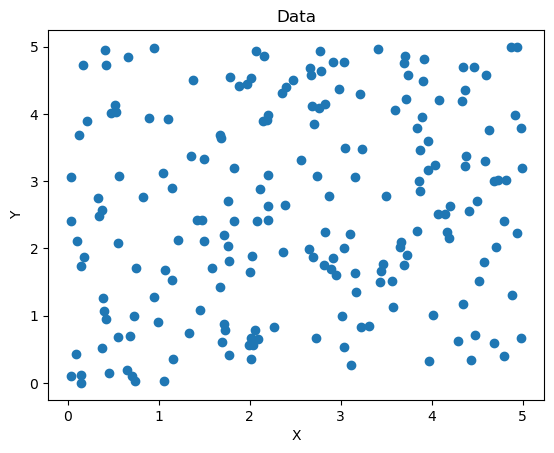

Epoch: 0 Accuracy: 75.0
Epoch: 1 Accuracy: 75.0
Epoch: 2 Accuracy: 75.0
Epoch: 3 Accuracy: 89.25
Epoch: 4 Accuracy: 98.25
Epoch: 5 Accuracy: 99.75
Epoch: 6 Accuracy: 100.0
Epoch: 7 Accuracy: 100.0
Epoch: 8 Accuracy: 100.0
Epoch: 9 Accuracy: 100.25
Epoch: 10 Accuracy: 100.25
Epoch: 11 Accuracy: 100.5
Epoch: 12 Accuracy: 100.75
Epoch: 13 Accuracy: 100.5
Epoch: 14 Accuracy: 100.75
Epoch: 15 Accuracy: 100.75
Epoch: 16 Accuracy: 100.5
Epoch: 17 Accuracy: 100.75
Epoch: 18 Accuracy: 101.0
Epoch: 19 Accuracy: 101.0
Epoch: 20 Accuracy: 101.0
Epoch: 21 Accuracy: 101.0
Epoch: 22 Accuracy: 101.0
Epoch: 23 Accuracy: 101.25
Epoch: 24 Accuracy: 101.75
Epoch: 25 Accuracy: 101.75
Epoch: 26 Accuracy: 101.75
Epoch: 27 Accuracy: 101.75
Epoch: 28 Accuracy: 101.75
Epoch: 29 Accuracy: 102.0
Epoch: 30 Accuracy: 102.0
Epoch: 31 Accuracy: 102.0
Epoch: 32 Accuracy: 102.0
Epoch: 33 Accuracy: 102.25
Epoch: 34 Accuracy: 102.5
Epoch: 35 Accuracy: 102.5
Epoch: 36 Accuracy: 102.75
Epoch: 37 Accuracy: 102.75
Epoch: 38 

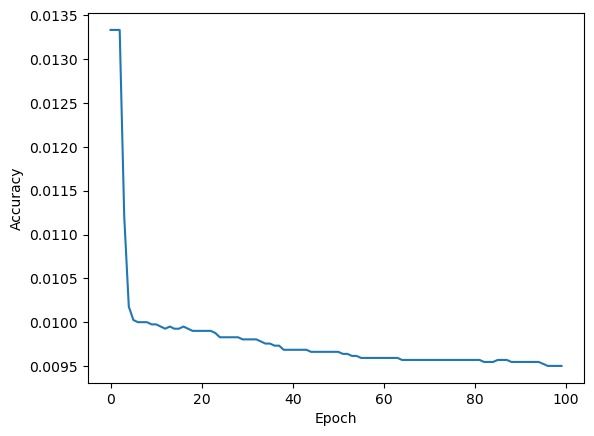

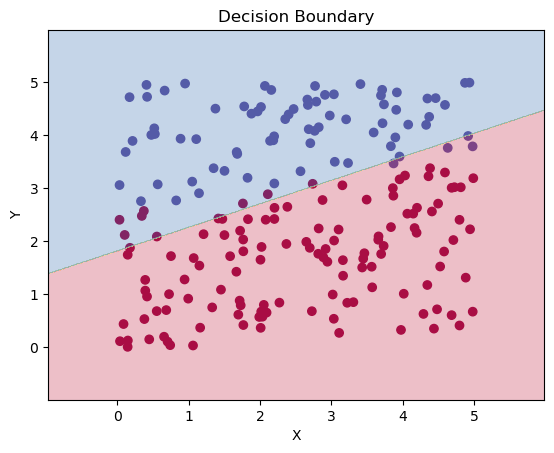

In [10]:

#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


# Plot the decision boundary
def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()


x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
#header column 0 is label
y.columns = ['label']

# Plot the data
plt.scatter(x['X'], x['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data')
plt.show()

# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

#Plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot the decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)


In [12]:
def create_batches(data, batch_size):
    """
    Create batches from the given data.

    Parameters:
    - data: List of data points (e.g., features or labels)
    - batch_size: Size of each batch

    Returns:
    - List of batches, where each batch is a sublist of the original data
    """
    batches = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        batches.append(batch)
    return batches

# Example usage:
# Suppose you have a list of features
features = pd.read_csv('./XY/x.csv', header=None)
features = features.drop(features.columns[0], axis=1)
features.columns = ['X', 'Y']
features = features.to_numpy()


# Set the batch size
batch_size = 3

# Create batches
feature_batches = create_batches(features, batch_size)

# Print the batches
for i, batch in enumerate(feature_batches):
    print(f"Batch {i + 1}: {batch}")


Batch 1: [[2.82273656 4.15404756]
 [0.74107395 0.03244734]
 [4.79497494 0.4044992 ]]
Batch 2: [[1.6727669  3.6850565 ]
 [3.57162611 1.12629871]
 [4.14629624 2.5197014 ]]
Batch 3: [[1.50202185 3.32868653]
 [3.69459525 4.75555346]
 [4.88221002 1.30920914]]
Batch 4: [[2.14063622 3.89648667]
 [0.33158126 2.75550025]
 [4.79506709 2.40309694]]
Batch 5: [[4.16559889 2.24727911]
 [2.35296973 4.30715733]
 [1.77825029 4.54733586]]
Batch 6: [[0.66341064 4.84711533]
 [2.67047873 4.57528147]
 [3.03378045 0.53134344]]
Batch 7: [[2.10889976 2.88696582]
 [2.97720694 4.37506377]
 [3.04721374 3.50037695]]
Batch 8: [[3.83486993 2.26516712]
 [3.40712682 4.96972176]
 [4.98823703 3.1901343 ]]
Batch 9: [[2.02140686 1.89012427]
 [2.03391541 0.57053288]
 [4.3823296  3.37963333]]
Batch 10: [[4.49523602 2.70934581]
 [4.68485266 3.00839287]
 [1.58097486 1.71478666]]
Batch 11: [[4.9788088  3.79183901]
 [1.87956206 4.41032851]
 [0.55229889 0.67648945]]
Batch 12: [[0.37929757 0.52582375]
 [3.30789028 0.84571822]
 [0

In [13]:
import numpy as np
import pandas as pd

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0

    def predict(self, inputs):
        # Compute the weighted sum of inputs and add the bias
        linear_sum = np.dot(self.weights, inputs) + self.bias
        # Apply the step function (threshold at 0)
        return 1 if linear_sum >= 0 else 0

    def train(self, training_data, labels, epochs=100, learning_rate=0.1):
        for epoch in range(epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                # Update weights and bias based on the perceptron learning rule
                self.weights += learning_rate * (label - prediction) * inputs
                self.bias += learning_rate * (label - prediction)

# Example usage:
# Load labels from a CSV file (assuming a binary classification problem)
labels = pd.read_csv('./XY/y.csv', header=None)
labels.columns = ['Label']
labels = labels.to_numpy().flatten()

# Assuming features and labels have the same number of data points
assert len(features) == len(labels), "Number of features and labels must be the same"

# Set the batch size
batch_size = 3

# Create batches for both features and labels
feature_batches = create_batches(features, batch_size)
label_batches = create_batches(labels, batch_size)

# Initialize the perceptron
perceptron = Perceptron(input_size=2)

# Train the perceptron on each batch
for features_batch, labels_batch in zip(feature_batches, label_batches):
    perceptron.train(features_batch, labels_batch)

# Test the trained perceptron
test_input = np.array([X_test, Y_test])  # Replace X_test and Y_test with your test data
prediction = perceptron.predict(test_input)

print(f"The perceptron predicts: {prediction}")


ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

Epoch: 0 Accuracy: 0.90625
Epoch: 1 Accuracy: 0.90625
Epoch: 2 Accuracy: 0.90625
Epoch: 3 Accuracy: 0.90625
Epoch: 4 Accuracy: 0.90625
Epoch: 5 Accuracy: 0.90625
Epoch: 6 Accuracy: 0.90625
Epoch: 7 Accuracy: 0.90625
Epoch: 8 Accuracy: 0.90625
Epoch: 9 Accuracy: 0.90625
Epoch: 10 Accuracy: 0.90625
Epoch: 11 Accuracy: 0.90625
Epoch: 12 Accuracy: 0.90625
Epoch: 13 Accuracy: 0.90625
Epoch: 14 Accuracy: 0.90625
Epoch: 15 Accuracy: 0.90625
Epoch: 16 Accuracy: 0.90625
Epoch: 17 Accuracy: 0.90625
Epoch: 18 Accuracy: 0.90625
Epoch: 19 Accuracy: 0.90625
Epoch: 20 Accuracy: 0.90625
Epoch: 21 Accuracy: 0.90625
Epoch: 22 Accuracy: 0.90625
Epoch: 23 Accuracy: 0.90625
Epoch: 24 Accuracy: 0.90625
Epoch: 25 Accuracy: 0.90625
Epoch: 26 Accuracy: 0.90625
Epoch: 27 Accuracy: 0.90625
Epoch: 28 Accuracy: 0.90625
Epoch: 29 Accuracy: 0.90625
Epoch: 30 Accuracy: 0.90625
Epoch: 31 Accuracy: 0.90625
Epoch: 32 Accuracy: 0.90625
Epoch: 33 Accuracy: 0.90625
Epoch: 34 Accuracy: 0.90625
Epoch: 35 Accuracy: 0.90625
Ep

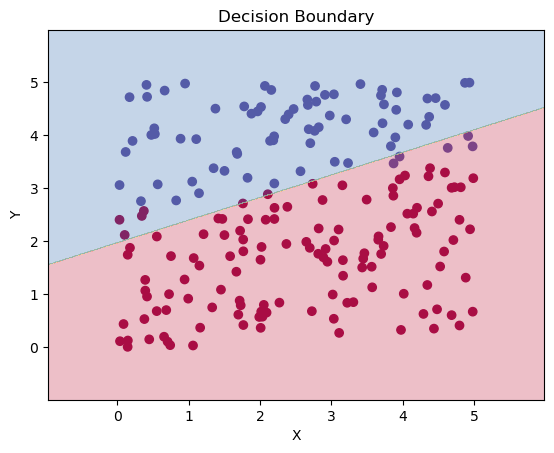

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1 / accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))

# Function to create batches
def create_batches(data, labels, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size], labels[i:i + batch_size]
        print(data[i:i + batch_size], labels[i:i + batch_size])

# Example usage:
# Assuming you have training data and labels (training_inputs, labels)
training_inputs = pd.read_csv('./XY/x.csv', header=None)
training_inputs = training_inputs.drop(training_inputs.columns[0], axis=1)
training_inputs.columns = ['X', 'Y']
training_inputs = training_inputs.to_numpy()

labels = pd.read_csv('./XY/y.csv', header=None)
labels = labels.drop(labels.columns[0], axis=1)
labels.columns = ['Label']
labels = labels.to_numpy().flatten()

# Initialize perceptron with appropriate input size
input_size = len(training_inputs[0])
perceptron = Perceptron(learning_rate=0.01, epochs=100, weights=np.zeros(input_size + 1))

# Set the batch size
batch_size = 32

# Create batches
batches = create_batches(training_inputs, labels, batch_size)

# Train the perceptron on each batch
for batch_inputs, batch_labels in batches:
    perceptron.train(batch_inputs, batch_labels)

# Plot the decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)


In [ ]:
import numpy as np

class PerceptronSequential:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)




In [6]:
import numpy as np



class PerceptronBatch:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # Array para almacenar la precisión por época

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def calculate_accuracy(self, predictions, labels):
        correct_predictions = np.sum(predictions == labels)
        total_predictions = len(labels)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            predictions = []
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                predictions.append(prediction)
            errors = labels - predictions # Calcular los errores
            self.weights[1:] += self.learning_rate * np.dot(errors, training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors)

            accuracy = self.calculate_accuracy(predictions, labels)
            self.accuracies.append(1/accuracy)

            print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {1/accuracy}')

# Ejemplo de uso
training_inputs = pd.read_csv('./XY/x.csv', header=None)
training_inputs = training_inputs.drop(training_inputs.columns[0], axis=1)
training_inputs.columns = ['X', 'Y']
training_inputs = training_inputs.to_numpy()

labels = pd.read_csv('./XY/y.csv', header=None)
labels = labels.drop(labels.columns[0], axis=1)
labels.columns = ['Label']
labels = labels.to_numpy().flatten()


perceptron = PerceptronBatch(input_size=2, learning_rate=0.01, epochs=100, weights=np.random.rand(3))
perceptron.train(training_inputs, labels)

# Imprimir la precisión por época
print("Precisión por época:", perceptron.accuracies)


Epoch 1/100, Accuracy: inf
Epoch 2/100, Accuracy: inf
Epoch 3/100, Accuracy: inf
Epoch 4/100, Accuracy: inf
Epoch 5/100, Accuracy: inf
Epoch 6/100, Accuracy: inf
Epoch 7/100, Accuracy: inf
Epoch 8/100, Accuracy: inf
Epoch 9/100, Accuracy: inf
Epoch 10/100, Accuracy: inf
Epoch 11/100, Accuracy: inf
Epoch 12/100, Accuracy: inf
Epoch 13/100, Accuracy: inf
Epoch 14/100, Accuracy: inf
Epoch 15/100, Accuracy: inf
Epoch 16/100, Accuracy: inf
Epoch 17/100, Accuracy: inf
Epoch 18/100, Accuracy: inf
Epoch 19/100, Accuracy: inf
Epoch 20/100, Accuracy: inf
Epoch 21/100, Accuracy: inf
Epoch 22/100, Accuracy: inf
Epoch 23/100, Accuracy: inf
Epoch 24/100, Accuracy: inf
Epoch 25/100, Accuracy: inf
Epoch 26/100, Accuracy: inf
Epoch 27/100, Accuracy: inf
Epoch 28/100, Accuracy: inf
Epoch 29/100, Accuracy: inf
Epoch 30/100, Accuracy: inf
Epoch 31/100, Accuracy: inf
Epoch 32/100, Accuracy: inf
Epoch 33/100, Accuracy: inf
Epoch 34/100, Accuracy: inf
Epoch 35/100, Accuracy: inf
Epoch 36/100, Accuracy: inf
E

/var/folders/pb/qpx63t394c998ss75fwztzh80000gn/T/ipykernel_41470/1888594990.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  self.accuracies.append(1/accuracy)
/var/folders/pb/qpx63t394c998ss75fwztzh80000gn/T/ipykernel_41470/1888594990.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {1/accuracy}')


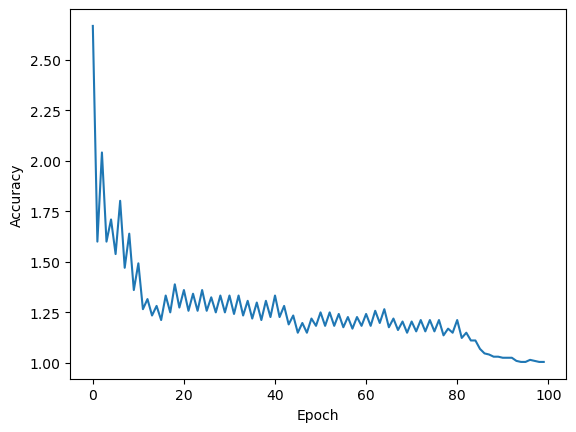

In [22]:
# Plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [2]:
import numpy as np
import pandas as pd
class PerceptronSequential:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # Array para almacenar la precisión por época

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def calculate_accuracy(self, predictions, labels):
        correct_predictions = np.sum(predictions == labels)
        total_predictions = len(labels)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            predictions = []
            for x in training_inputs:
                predictions.append(self.predict(x))
            predictions = np.array(predictions)
            for inputs, label, prediction in zip(training_inputs, labels, predictions):
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

            accuracy = self.calculate_accuracy(predictions, labels)
            self.accuracies.append(accuracy)

            print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {accuracy}')

# Ejemplo de uso
training_inputs = pd.read_csv('./XY/x.csv', header=None)
training_inputs = training_inputs.drop(training_inputs.columns[0], axis=1)
training_inputs.columns = ['X', 'Y']
training_inputs = training_inputs.to_numpy()

labels = pd.read_csv('./XY/y.csv', header=None)
labels = labels.drop(labels.columns[0], axis=1)
labels.columns = ['Label']
labels = labels.to_numpy().flatten()


perceptron = PerceptronSequential(input_size=2, learning_rate=0.01, epochs=100)
perceptron.train(training_inputs, labels)

# Imprimir la precisión por época
print("Precisión por época:", perceptron.accuracies)


TypeError: 'NoneType' object is not subscriptable

Epoch 1/100, Accuracy: 0.375
Epoch 2/100, Accuracy: 0.525
Epoch 3/100, Accuracy: 0.9
Epoch 4/100, Accuracy: 0.86
Epoch 5/100, Accuracy: 0.86
Epoch 6/100, Accuracy: 0.85
Epoch 7/100, Accuracy: 0.86
Epoch 8/100, Accuracy: 0.845
Epoch 9/100, Accuracy: 0.86
Epoch 10/100, Accuracy: 0.86
Epoch 11/100, Accuracy: 0.865
Epoch 12/100, Accuracy: 0.875
Epoch 13/100, Accuracy: 0.87
Epoch 14/100, Accuracy: 0.875
Epoch 15/100, Accuracy: 0.88
Epoch 16/100, Accuracy: 0.885
Epoch 17/100, Accuracy: 0.885
Epoch 18/100, Accuracy: 0.885
Epoch 19/100, Accuracy: 0.885
Epoch 20/100, Accuracy: 0.89
Epoch 21/100, Accuracy: 0.89
Epoch 22/100, Accuracy: 0.89
Epoch 23/100, Accuracy: 0.89
Epoch 24/100, Accuracy: 0.895
Epoch 25/100, Accuracy: 0.895
Epoch 26/100, Accuracy: 0.895
Epoch 27/100, Accuracy: 0.895
Epoch 28/100, Accuracy: 0.895
Epoch 29/100, Accuracy: 0.895
Epoch 30/100, Accuracy: 0.9
Epoch 31/100, Accuracy: 0.9
Epoch 32/100, Accuracy: 0.9
Epoch 33/100, Accuracy: 0.905
Epoch 34/100, Accuracy: 0.91
Epoch 35/1

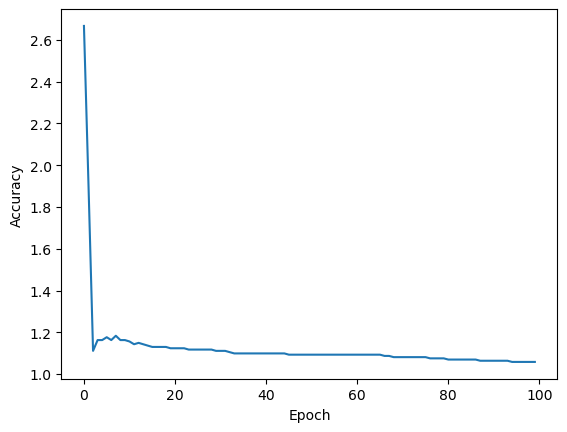

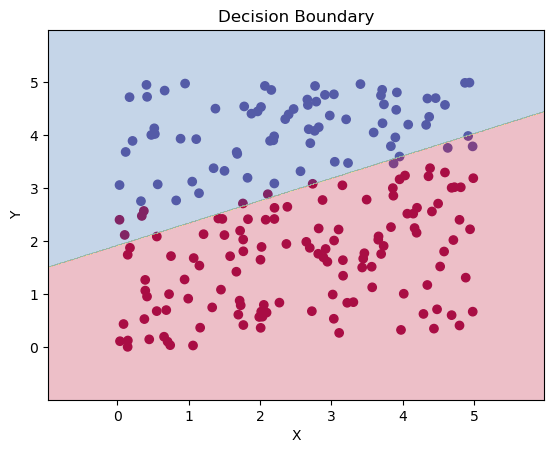

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class PerceptronBatch:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights if weights is not None else np.random.rand(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # Array para almacenar la precisión por época

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.sigmoid(summation)

    def calculate_accuracy(self, predictions, labels):
        thresholded_predictions = (predictions >= 0.5).astype(int)
        correct_predictions = np.sum(thresholded_predictions == labels)
        total_predictions = len(labels)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            predictions = []
            for inputs, label in zip(training_inputs, labels):
                predictions.append(self.predict(inputs))
            predictions = np.array(predictions)

            errors = labels - predictions  # Calcular los errores

            # Actualizar pesos utilizando la regla de actualización del perceptrón
            self.weights[1:] += self.learning_rate * np.dot(errors * predictions * (1 - predictions), training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors * predictions * (1 - predictions))

            accuracy = self.calculate_accuracy(predictions, labels)
            self.accuracies.append(1/accuracy)

            print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {accuracy}')

def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()



# Ejemplo de uso
training_inputs = pd.read_csv('./XY/x.csv', header=None)
training_inputs = training_inputs.drop(training_inputs.columns[0], axis=1)
training_inputs.columns = ['X', 'Y']
training_inputs = training_inputs.to_numpy()

labels = pd.read_csv('./XY/y.csv', header=None)
labels = labels.drop(labels.columns[0], axis=1)
labels.columns = ['Label']
labels = labels.to_numpy().flatten()

perceptron = PerceptronBatch(input_size=2, learning_rate=0.01, epochs=100)
perceptron.train(training_inputs, labels)

# Imprimir la precisión por época
print("Precisión por época:", perceptron.accuracies)

# Plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot the decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)



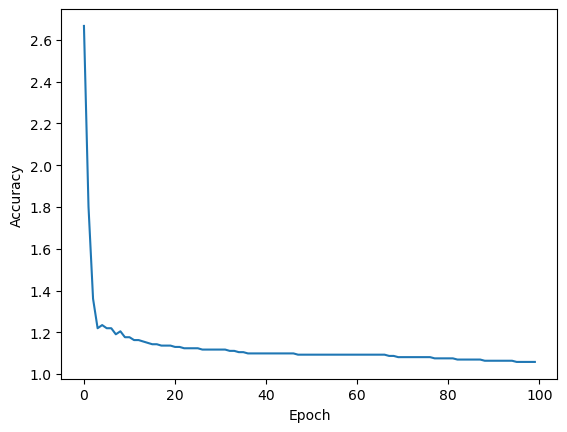

In [32]:
# plot accuracy
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
